In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=f17d64bb78e590809d150414c2d8019cacc09c2e3b0b8b133b25524b2954f005
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


# The entire project has two modules
##1. Face Recogntion
##2. Face Clustering

#1. Face Extraction(Recognition) Module

In [ ]:
import numpy as np

In [ ]:
# for extracting faces from image repository
import face_recognition

In [ ]:
import argparse

In [ ]:
pip install imutils


In [ ]:
#importing necessary libraries

from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os




In [ ]:
# unzip the data set...
from zipfile import ZipFile
file_name = "/content/face-clustering.zip"
with ZipFile(file_name,'r') as z:
  z.extractall()
  print("Done")


Done


In [ ]:
# makig a path to the image source
print("quantifying faces")
imagePaths=list(paths.list_images("/content/face-clustering/dataset"))
data=[]

quantifying faces


In [ ]:
#extracting the encodings(128-d feature vectors)
for (i,imagePath) in enumerate(imagePaths):
  print("processing image{}/{}".format(i+1,len(imagePaths)))
  print(imagePath)
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb,model='cnn')
  encodings= face_recognition.face_encodings(rgb,boxes)
  #build a directory of image path,boundingbox,location
  #and facial encodings for the current image
  d=[{"imagePath":imagePath,"loc":box,"encoding":enc}
     for (box,enc) in zip(boxes,encodings)]
  data.extend(d)

processing image1/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.53.08 AM.jpeg
processing image2/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 6.12.16 PM.jpeg
processing image3/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02.11 PM(2).jpeg
processing image4/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.53.05 AM.jpeg
processing image5/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02.09 PM(7).jpeg
processing image6/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02.10 PM.jpeg
processing image7/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.53.04 AM.jpeg
processing image8/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.02.10 PM(2).jpeg
processing image9/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 6.12.16 PM(1).jpeg
processing image10/98
/content/face-clustering/dataset/WhatsApp Image 2019-10-24 at 7.52.56 AM.jp

In [ ]:
# storing the encodings in pickle file
# which will bw later used for face clustering module
print("serialising encodings...")
f = open("face_encodings.pickle","wb")
pickle.dump(data,f)
f.close()

serialising encodings...


## 2 . Face Clustering Module

In [ ]:
# import the necessary packages
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from imutils import build_montages
import numpy as np
import argparse
import pickle
import cv2

In [ ]:
print("[INFO] loading encodings...")
data = pickle.loads(open("/content/face_encodings.pickle", "rb").read())
data = np.array(data)
encodings = [d["encoding"] for d in data]


[INFO] loading encodings...


In [ ]:
import tensorflow as tf
# cluster the embeddings
#print('Enter number of clusters:')
#n_clusters=input('Enter number of clusters')
print("[INFO] clustering...")
#for comparision purpose...
clt = DBSCAN(metric="euclidean", n_jobs=100)
#clt =KMeans(n_clusters=5)
clt.fit(encodings)
labels=clt.labels_ 
# determine the total number of unique faces found in the dataset
labelIDs = np.unique(clt.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] # unique faces: {}".format(numUniqueFaces))

[INFO] clustering...
[INFO] # unique faces: 5


In [ ]:
pip install pytest-shutil

In [ ]:
pip install python-resize-image

In [ ]:
from resizeimage import resizeimage
import shutil

In [ ]:
#To extract full image
print(os.getcwd())
OutputFolderName = "Clustered Faces"
output_directory = os.getcwd()
OutputFolder = os.path.join(output_directory, OutputFolderName)
if not os.path.exists(OutputFolder):
  os.mkdir(OutputFolder)
else:
  shutil.rmtree(OutputFolder) 
  #time.sleep(0.5) 
  os.makedirs(OutputFolder) 

for labelID in labelIDs:
  print("[INFO] faces for face ID: {}".format(labelID))
  FaceFolder = os.path.join(OutputFolder, "Face_" + str(labelID))
  os.mkdir(FaceFolder)
  idxs = np.where(clt.labels_ == labelID)[0]
  portraits=[]
  # loop over the sampled indexes 
  counter = 1
  for i in idxs:
    # load the input image and extract the face  
    image = cv2.imread(data[i]["imagePath"]) 
    portrait = image
    portraits.append(portrait) 
    FaceFilename = "face_" + str(counter) + ".jpg"
    FaceImagePath = os.path.join(FaceFolder, FaceFilename)
    cv2.imwrite(FaceImagePath, portrait)
    counter += 1   

/content
[INFO] faces for face ID: 0
[INFO] faces for face ID: 1
[INFO] faces for face ID: 2
[INFO] faces for face ID: 3
[INFO] faces for face ID: 4


[INFO] faces for face ID: 0
[INFO] faces for face ID: 1
[INFO] faces for face ID: 2
[INFO] faces for face ID: 3
[INFO] faces for face ID: 4


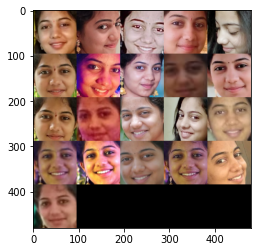

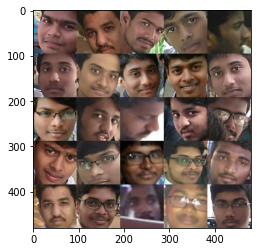

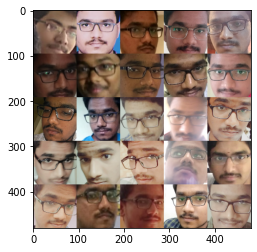

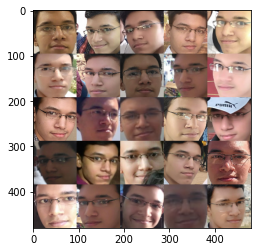

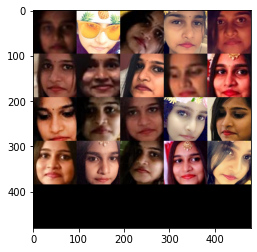

In [ ]:
# loop over the unique faces an to print montages of each cluster
# to show instant output
import matplotlib.pyplot as plt

for labelID in labelIDs:
  print("[INFO] faces for face ID: {}".format(labelID))
  idxs = np.where(clt.labels_ == labelID)[0]
  idxs = np.random.choice(idxs, size=min(25, len(idxs)),replace=False)
  # initialize the list of faces to include in the montage
  faces = []
  for i in idxs:
    image = cv2.imread(data[i]["imagePath"])
    (top,right,bottom,left) = data[i]["loc"]
    face = image[top:bottom,left:right]
    face = cv2.cvtColor(face,cv2.COLOR_RGB2BGR)
    face = cv2.resize(face,(96,96))
    faces.append(face)
    
  montage = build_montages(faces,(96,96),(5,5))[0]
  title = "Face ID #{}".format(labelID)
  title = "UnKnown Faces" if labelID == -1 else title
  plt.figure()
  plt.imshow(montage)
  cv2.waitKey(0)

In [ ]:
print(os.getcwd())
#To extract every individual image
OutputFolderName = "Clustered Faces"
output_directory = os.getcwd()
OutputFolder = os.path.join(output_directory, OutputFolderName)
if not os.path.exists(OutputFolder):
  os.mkdir(OutputFolder)
else:
  shutil.rmtree(OutputFolder) 
  #time.sleep(0.5) 
  os.makedirs(OutputFolder) 

for labelID in labelIDs:
  print("[INFO] faces for face ID: {}".format(labelID))
  FaceFolder = os.path.join(OutputFolder, "Face_" + str(labelID))
  os.mkdir(FaceFolder)
  idxs = np.where(clt.labels_ == labelID)[0]
  portraits=[]
  # loop over the sampled indexes 
  counter = 1
  for i in idxs:
    # load the input image and extract the face ROI 
    image = cv2.imread(data[i]["imagePath"]) 
    (o_top, o_right, o_bottom, o_left) = data[i]["loc"]
    height, width, channel = image.shape
    widthMargin = 100
    heightMargin = 150
    top = o_top - heightMargin 
    if top < 0: top = 0
    bottom = o_bottom + heightMargin 
    if bottom > height: bottom = height 
    left = o_left - widthMargin 
    if left < 0: left = 0
    right = o_right + widthMargin 
    if right > width: right = width
    portrait = image[top:bottom, left:right]
    portraits.append(portrait) 
    #portrait = resizeimage.resize_width(portrait, 400)
    FaceFilename = "face_" + str(counter) + ".jpg"
    FaceImagePath = os.path.join(FaceFolder, FaceFilename)
    cv2.imwrite(FaceImagePath, portrait)
    counter += 1   

/content
[INFO] faces for face ID: 0
[INFO] faces for face ID: 1
[INFO] faces for face ID: 2
[INFO] faces for face ID: 3
[INFO] faces for face ID: 4
